In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [4]:
# Display column names to confirm
print("Columns in the dataset:")
print(df.columns)

# Select relevant features and the target variable based on actual column names
# Update with correct feature names (e.g., age, bp, sg, etc.)
X = df[["age", "bp", "sg", "al", "su"]]  # Replace with relevant features
y = df["classification"]  # Target column: 'classification'

# Convert categorical data to numerical if necessary (e.g., for "classification")
y = y.map({"ckd": 1, "notckd": 0})  # Map target variable to 0 and 1 if applicable

# Handle missing values (fill with mean/median or drop rows)
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])

# Proceed with train-test split and modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Columns in the dataset:
Index([' ', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [5]:
# Select relevant features and the target variable based on the dataset
# Features: 'age', 'bp', 'sg', 'al', 'su' (you can adjust these based on relevance)
# Target: 'classification' (mapping 'ckd' -> 1, 'notckd' -> 0)
X = df[['age', 'bp', 'sg', 'al', 'su']]  # Update these features as needed
y = df['classification']  # Target column

# Map the target variable from categorical to numerical values
y = y.map({'ckd': 1, 'notckd': 0})

# Handle missing values
X = X.fillna(X.mean())  # Fill missing values in features with their mean
y = y.fillna(y.mode()[0])  # Fill missing values in target with the mode

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import and train models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("\nNaive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, nb_predictions))

# SVM Model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("\nSVM Results:")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Compare Results
print("\nModel Comparison:")
print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}")
print(f"SVM - Accuracy: {svm_accuracy:.4f}")



Naive Bayes Results:
Accuracy: 0.9444
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        42
         1.0       0.98      0.92      0.95        48

    accuracy                           0.94        90
   macro avg       0.94      0.95      0.94        90
weighted avg       0.95      0.94      0.94        90


SVM Results:
Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.98      0.90        42
         1.0       0.98      0.83      0.90        48

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.91      0.90      0.90        90


Model Comparison:
Naive Bayes - Accuracy: 0.9444
SVM - Accuracy: 0.9000


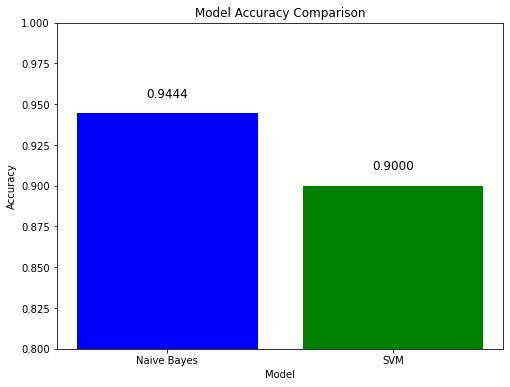

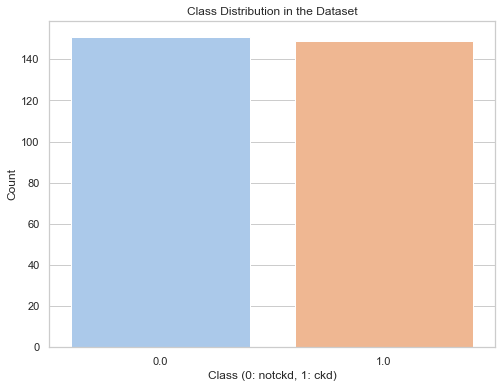

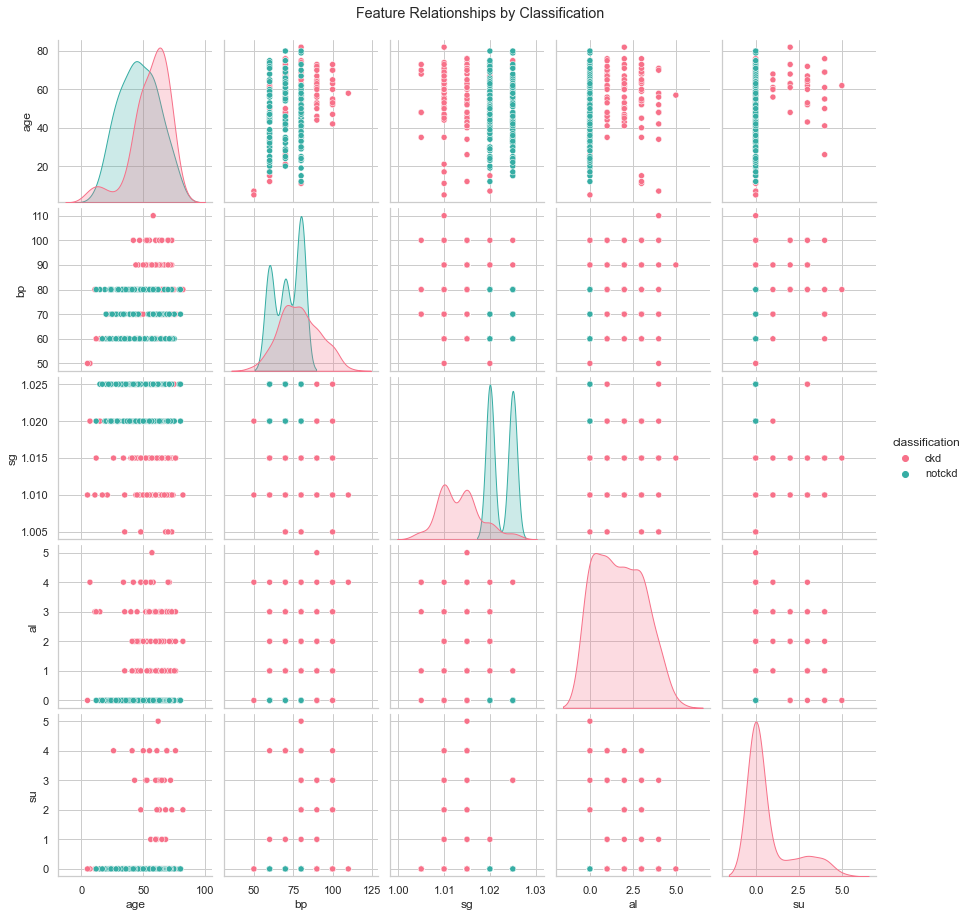

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize accuracy of the models
model_names = ['Naive Bayes', 'SVM']
accuracies = [0.9444, 0.9000]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

# Visualize the class distribution in the dataset
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='pastel')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class (0: notckd, 1: ckd)')
plt.ylabel('Count')
plt.show()

# Pairplot of selected features to visualize relationships
selected_features = ['age', 'bp', 'sg', 'al', 'su', 'classification']
sns.pairplot(df[selected_features].dropna(), hue="classification", palette="husl", diag_kind="kde")
plt.suptitle('Feature Relationships by Classification', y=1.02)
plt.show()


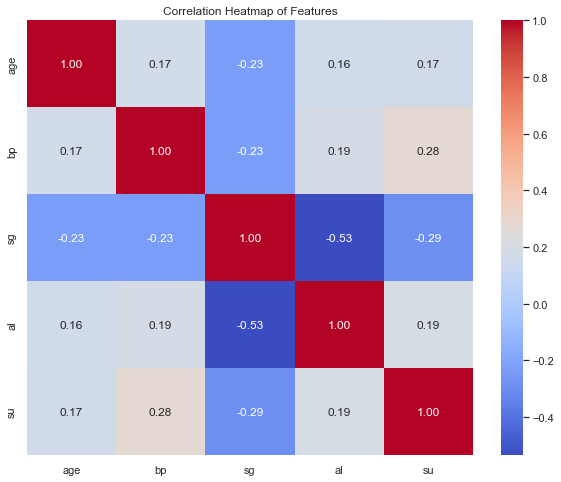

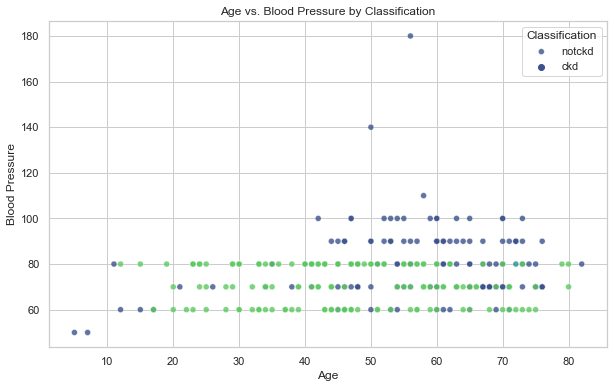

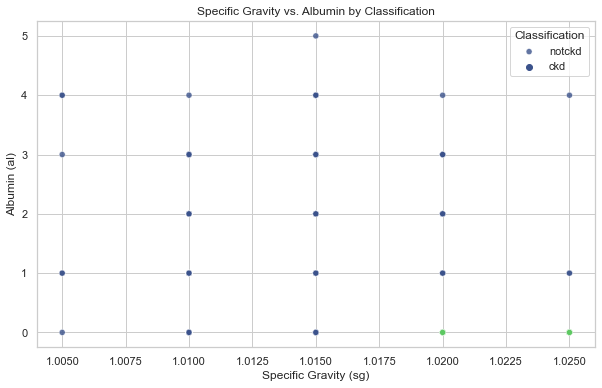

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'bp', 'sg', 'al', 'su']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Scatter plots with color-coded classification
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bp', hue='classification', palette='viridis', alpha=0.8)
plt.title('Age vs. Blood Pressure by Classification')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Classification', labels=['notckd', 'ckd'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sg', y='al', hue='classification', palette='viridis', alpha=0.8)
plt.title('Specific Gravity vs. Albumin by Classification')
plt.xlabel('Specific Gravity (sg)')
plt.ylabel('Albumin (al)')
plt.legend(title='Classification', labels=['notckd', 'ckd'])
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['linear', 'rbf']     # Type of SVM kernel
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
svm_test_accuracy = best_svm_model.score(X_test, y_test)

# Display results
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Set Accuracy:", svm_test_accuracy)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   1.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END ...................

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Display results
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_confusion_matrix)


Random Forest Results:
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        42
         1.0       1.00      0.94      0.97        48

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

Confusion Matrix:
 [[42  0]
 [ 3 45]]


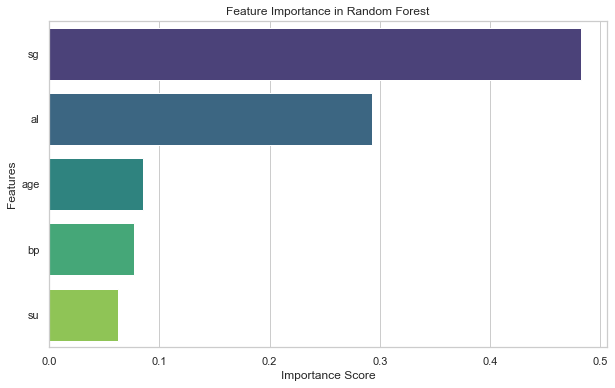

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



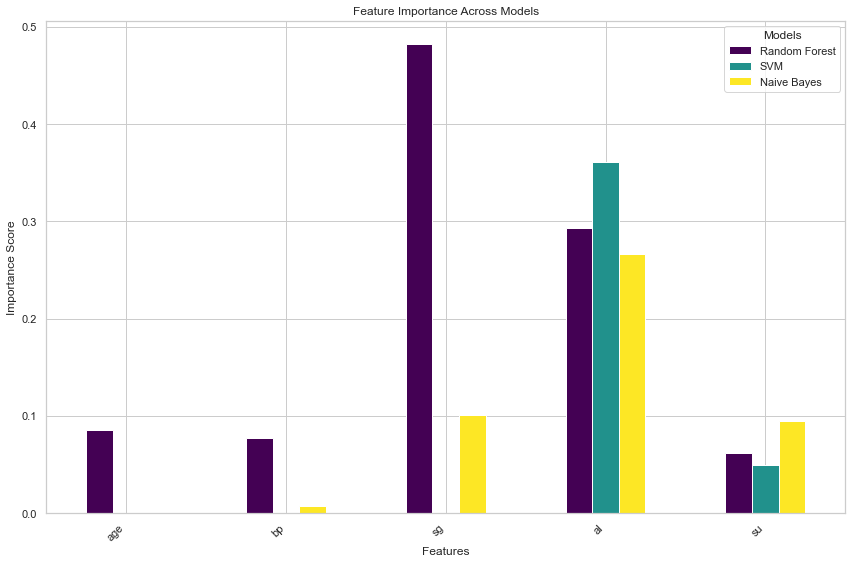

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_

# SVM Feature Importance (Permutation Importance)
svm_importances = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42).importances_mean

# Naive Bayes Feature Importance (Permutation Importance)
nb_importances = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=42).importances_mean

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Random Forest": rf_importances,
    "SVM": svm_importances,
    "Naive Bayes": nb_importances
}).set_index("Feature")

# Plot the feature importance for all models
importance_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Feature Importance Across Models")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.legend(title="Models")
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


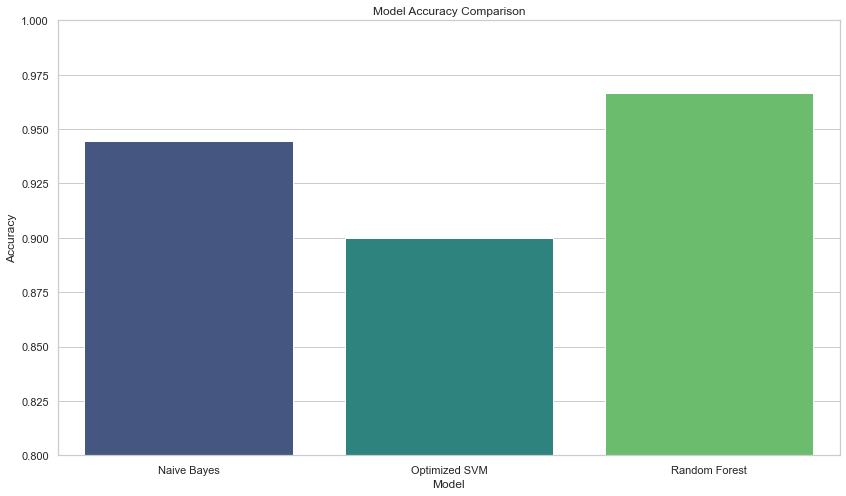

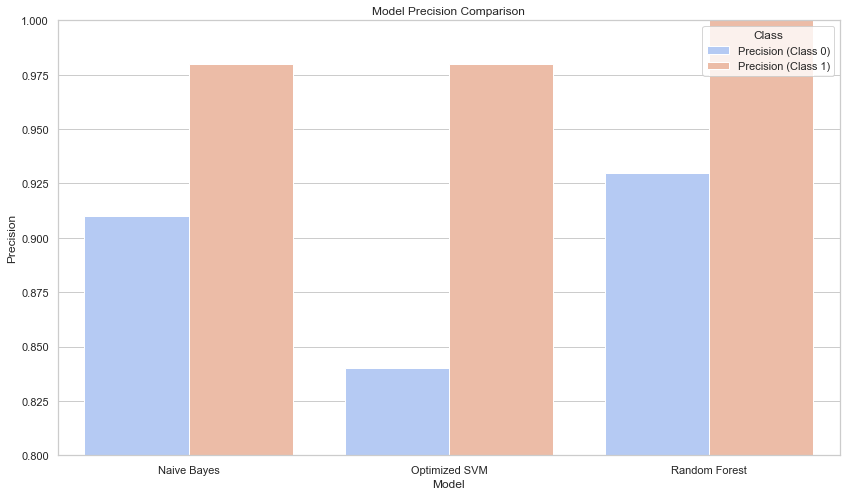

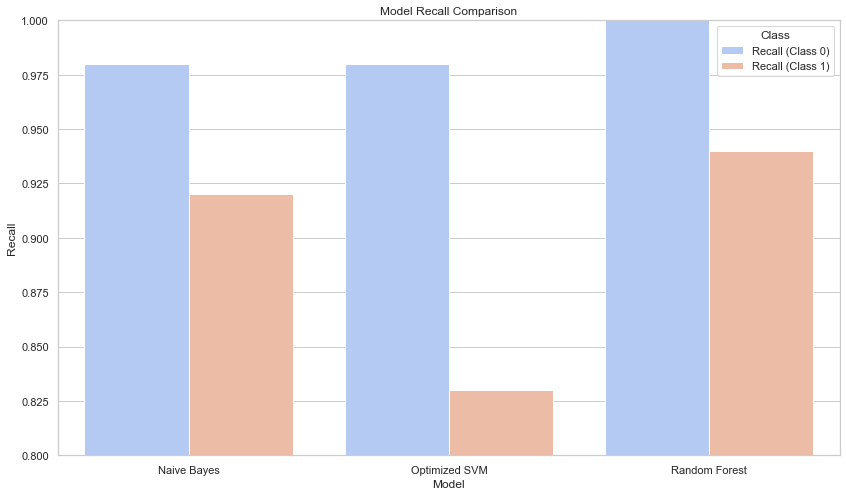

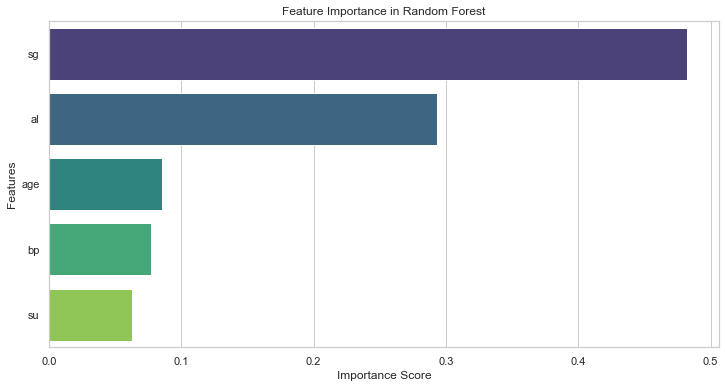

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store the performance metrics for each model
model_performance = {
    "Model": ["Naive Bayes", "Optimized SVM", "Random Forest"],
    "Accuracy": [nb_accuracy, svm_test_accuracy, rf_accuracy],
    "Precision (Class 0)": [0.91, 0.84, 0.93],
    "Precision (Class 1)": [0.98, 0.98, 1.00],
    "Recall (Class 0)": [0.98, 0.98, 1.00],
    "Recall (Class 1)": [0.92, 0.83, 0.94],
}

performance_df = pd.DataFrame(model_performance)

# Plot performance metrics: Accuracy
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Accuracy", data=performance_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.8, 1.0)
plt.show()

# Precision comparison
precision_df = performance_df[["Model", "Precision (Class 0)", "Precision (Class 1)"]].melt(
    id_vars="Model", var_name="Class", value_name="Precision"
)
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Precision", hue="Class", data=precision_df, palette="coolwarm")
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.xlabel("Model")
plt.ylim(0.8, 1.0)
plt.legend(title="Class")
plt.show()

# Recall comparison
recall_df = performance_df[["Model", "Recall (Class 0)", "Recall (Class 1)"]].melt(
    id_vars="Model", var_name="Class", value_name="Recall"
)
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Recall", hue="Class", data=recall_df, palette="coolwarm")
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.ylim(0.8, 1.0)
plt.legend(title="Class")
plt.show()

# Feature Importance for Random Forest
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Random Forest": rf_model.feature_importances_
}).sort_values(by="Random Forest", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Random Forest", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
